### mahdieh yazdi</h3>
### mahdiehyazdi801@gmail.com
### st code : 40012920005

# <h1>import </h1>

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

<h1>upload dataset</h1>

In [142]:
data = pd.read_csv('./covid.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   #                    487 non-null    int64 
 1   age                  487 non-null    object
 2   Sleep_problems       487 non-null    object
 3   Headache             486 non-null    object
 4   Diarrhea             487 non-null    object
 5   Abdominal_pain       487 non-null    object
 6   body_pain            487 non-null    object
 7   Body_discoloration   487 non-null    object
 8   Cough                487 non-null    object
 9   Fever                487 non-null    object
 10  Ague                 487 non-null    object
 11  Sore_throat          487 non-null    object
 12  Fatigue              487 non-null    object
 13  runny_nose           487 non-null    object
 14  Chest_pain           487 non-null    object
 15  Decreased_appetite   487 non-null    object
 16  Vomit   

In [143]:
data.head(200)

,#,age,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria,result
0,1,19,yes,yes,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
1,2,28,yes,yes,no,no,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
2,3,40,no,yes,no,no,yes,yes,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
3,4,62,yes,yes,yes,yes,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
4,5,23,yes,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,-,no,no,no,no,yes,no,yes,yes,no,yes,no,no,no,no,no,yes,no,no,no,no,no,yes
196,197,-,no,no,no,no,yes,no,yes,no,no,yes,yes,no,no,yes,no,yes,no,no,no,no,no,yes
197,198,-,no,no,no,no,yes,no,yes,no,no,yes,no,no,no,no,no,yes,no,no,no,no,no,yes
198,199,-,no,no,no,no,yes,no,yes,no,no,no,no,no,no,no,no,yes,no,no,yes,no,no,yes


In [144]:
# data['Sleep_problems'] = data['Sleep_problems'].apply(lambda x: 1 if x=='yes' else 0)
# data['Headache'] = data['Headache'].apply(lambda x: 1 if x=='yes' else 0)
# data['Diarrhea'] = data['Diarrhea'].apply(lambda x: 1 if x.strip()=='yes' else 0)
# data['Abdominal_pain'] = data['Abdominal_pain'].apply(lambda x: 1 if x.strip()=='yes' else 0)
# data['body_pain'] = data['body_pain'].apply(lambda x: 1 if x.strip()=='yes' else 0)
# data['Body_discoloration'] = data['Body_discoloration'].apply(lambda x: 1 if x.strip()=='yes' else 0)
# data['Cough'] = data['Cough'].apply(lambda x: 1 if x.strip()=='yes' else 0)
# data['Fever'] = data['Fever'].apply(lambda x: 1 if x.strip()=='yes' else 0)
# data['Ague'] = data['Ague'].apply(lambda x: 1 if x.strip()=='yes' else 0)
# data['Sore_throat'] = data['Sore_throat'].apply(lambda x: 1 if x.strip()=='yes' else 0)
# data['Fatigue'] = data['Fatigue'].apply(lambda x: 1 if x.strip()=='yes' else 0)
# data['runny_nose'] = data['runny_nose'].apply(lambda x: 1 if x.strip()=='yes' else 0)
# data['Chest_pain'] = data['Chest_pain'].apply(lambda x: 1 if x.strip()=='yes' else 0)
# data['Decreased_appetite'] = data['Decreased_appetite'].apply(lambda x: 1 if x.strip()=='yes' else 0)
# data['Vomit'] = data['Vomit'].apply(lambda x: 1 if x.strip()=='yes' else 0)
# data['Nausea'] = data['Nausea'].apply(lambda x: 1 if x.strip()=='yes' else 0)
# data['Sneezing'] = data['Sneezing'].apply(lambda x: 1 if x.strip()=='yes' else 0)
# data['Shortness_of_breath'] = data['Shortness_of_breath'].apply(lambda x: 1 if x.strip()=='yes' else 0)
# data['Loss_of_smell'] = data['Loss_of_smell'].apply(lambda x: 1 if x.strip()=='yes' else 0)
# data['Loss_of_taste'] = data['Loss_of_taste'].apply(lambda x: 1 if x.strip()=='yes' else 0)
# data['urticaria'] = data['urticaria'].apply(lambda x: 1 if x.strip()=='yes' else 0)
# data['result'] = data['result'].apply(lambda x: 1 if x.strip()=='yes' else 0)

# data.head(20000)

data.replace(('yes', 'no'), (1, 0), inplace=True)
data.replace(('Yes', 'No'), (1, 0), inplace=True)
data.head(20000)

,#,age,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria,result
0,1,19,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,28,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,40,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,62,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,23,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,26,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,1
483,484,51,0,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,1
484,485,32,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1
485,486,30,0,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1


<h1>Normalize </h1>

In [145]:
y = data['result'].values
y = y.reshape(-1,1)
x_data = data.drop(['result', '#', 'age'],axis = 1)
print(x_data)

     Sleep_problems  Headache  ...  Loss_of_taste  urticaria
0                 1         1  ...              0          0
1                 1         1  ...              0          0
2                 0         1  ...              0          0
3                 1         1  ...              0          0
4                 1         1  ...              0          0
..              ...       ...  ...            ...        ...
482               0         1  ...              0          0
483               0         0  ...              1          0
484               0         0  ...              1          0
485               0         0  ...              1          0
486               0         1  ...              0          0

[487 rows x 21 columns]


In [146]:
normalize = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
normalize.head(20000)

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
483,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
484,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
485,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


<h1>sort data </h1>

In [147]:
sort_data = normalize.apply(lambda x: x.sort_values().values)
print (sort_data)

     Sleep_problems  Headache  ...  Loss_of_taste  urticaria
0               0.0       0.0  ...            0.0        0.0
1               0.0       0.0  ...            0.0        0.0
2               0.0       0.0  ...            0.0        0.0
3               0.0       0.0  ...            0.0        0.0
4               0.0       0.0  ...            0.0        0.0
..              ...       ...  ...            ...        ...
482             1.0       1.0  ...            1.0        1.0
483             1.0       1.0  ...            1.0        1.0
484             1.0       1.0  ...            1.0        1.0
485             1.0       1.0  ...            1.0        1.0
486             1.0       1.0  ...            1.0        1.0

[487 rows x 21 columns]


In [148]:
sort_data.isnull().sum()

Sleep_problems         0
Headache               0
Diarrhea               0
Abdominal_pain         0
body_pain              0
Body_discoloration     0
Cough                  0
Fever                  0
Ague                   0
Sore_throat            0
Fatigue                0
runny_nose             0
Chest_pain             0
Decreased_appetite     0
Vomit                  0
Nausea                 0
Sneezing               0
Shortness_of_breath    0
Loss_of_smell          0
Loss_of_taste          0
urticaria              0
dtype: int64

<h1> drop duplicate dataset </h1>

In [149]:
drop_duplicate = sort_data.drop_duplicates()
print(drop_duplicate)

     Sleep_problems  Headache  ...  Loss_of_taste  urticaria
0               0.0       0.0  ...            0.0        0.0
205             0.0       0.0  ...            0.0        0.0
249             0.0       0.0  ...            0.0        0.0
268             0.0       0.0  ...            0.0        0.0
280             0.0       0.0  ...            0.0        0.0
284             0.0       1.0  ...            0.0        0.0
326             0.0       1.0  ...            0.0        0.0
353             0.0       1.0  ...            0.0        0.0
380             0.0       1.0  ...            0.0        0.0
394             0.0       1.0  ...            0.0        0.0
414             0.0       1.0  ...            0.0        0.0
423             0.0       1.0  ...            0.0        0.0
425             0.0       1.0  ...            1.0        0.0
426             0.0       1.0  ...            1.0        0.0
436             1.0       1.0  ...            1.0        0.0
445             1.0     

In [150]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size = 0.5,random_state=100)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (243, 21)
x_test:  (244, 21)
y_train:  (243, 1)
y_test:  (244, 1)


<h1>feture impotance</h1>

In [151]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [152]:
for i in x_train : 
  x_train.drop(i, axis=1)
  print("Accuracy", i, ":",metrics.accuracy_score(y_test, y_pred))
  print("========")

Accuracy Sleep_problems : 1.0
Accuracy Headache : 1.0
Accuracy Diarrhea : 1.0
Accuracy Abdominal_pain : 1.0
Accuracy body_pain : 1.0
Accuracy Body_discoloration : 1.0
Accuracy Cough : 1.0
Accuracy Fever : 1.0
Accuracy Ague : 1.0
Accuracy Sore_throat : 1.0
Accuracy Fatigue : 1.0
Accuracy runny_nose : 1.0
Accuracy Chest_pain : 1.0
Accuracy Decreased_appetite : 1.0
Accuracy Vomit : 1.0
Accuracy Nausea : 1.0
Accuracy Sneezing : 1.0
Accuracy Shortness_of_breath : 1.0
Accuracy Loss_of_smell : 1.0
Accuracy Loss_of_taste : 1.0
Accuracy urticaria : 1.0


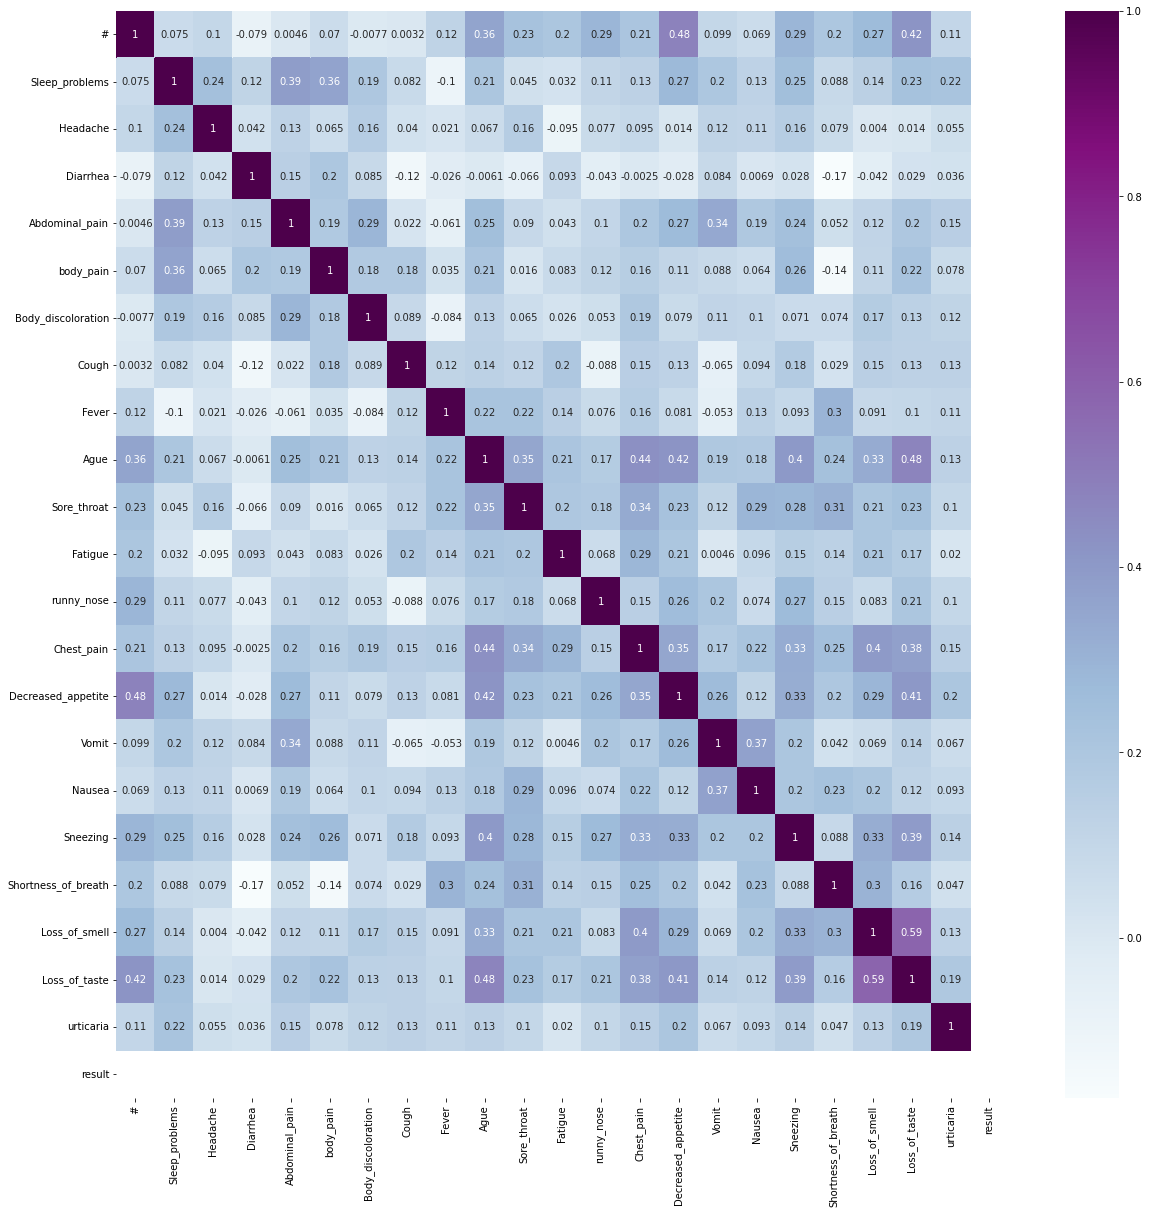

In [153]:
plt.figure(figsize=(20,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.BuPu)
plt.show()

In [154]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
rf.feature_importances_


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

Text(0.5, 0, 'Random Forest Feature Importance')

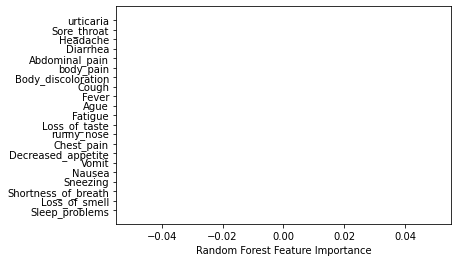

In [155]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

<h1>Decision Tree</h1>

In [156]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train.ravel())
print("Decision Tree Algorithm test accuracy: ", dtree.score(x_test, y_test))

Decision Tree Algorithm test accuracy:  1.0


<h1>ID3 </h1>

In [157]:
pip install chefboost

In [158]:
from chefboost import Chefboost as chef

config = {'algorithm': 'ID3'}
model = chef.fit(data, config = config, target_label = 'result')

[INFO]:  1 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  0.376802921295166  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.0
MSE:  0.0
RMSE:  0.0
RAE:  0.0
RRSE:  nan
Mean:  1.0
MAE / Mean:  0.0 %
RMSE / Mean:  0.0 %


/usr/local/lib/python3.7/dist-packages/chefboost/commons/evaluate.py:108: RuntimeWarning: invalid value encountered in true_divide
  rrse = math.sqrt((df['Absolute_Error_Squared'].sum()) / ((df['Decision_Mean'] - df['Decision']) ** 2).sum())


In [159]:
clf = DecisionTreeClassifier(random_state=0,criterion='entropy')
clf.fit(x_train, y_train)

y_pred=clf.predict(x_test)
y_pred
id3 = clf.score(x_test, y_test)
print("ID3 accuracy:", id3)

ID3 accuracy: 1.0


<h1>K-Nearest Neighbour (KNN)</h1>

In [160]:
K = 5
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(x_train, y_train.ravel())
print("When K = {} neighnors , KNN test accuracy: {}".format(K, knn.score(x_test, y_test)))
print("When K = {} neighnors , KNN train accuracy: {}".format(K, knn.score(x_train, y_train)))

When K = 5 neighnors , KNN test accuracy: 1.0
When K = 5 neighnors , KNN train accuracy: 1.0


In [161]:
ran = np.arange(1,30)
train_list = []
test_list = []
for i,each in enumerate(ran):
    knn = KNeighborsClassifier(n_neighbors=each)
    knn.fit(x_train, y_train.ravel())
    test_list.append(knn.score(x_test, y_test))
    train_list.append(knn.score(x_train, y_train))

Best test score is 1.0 and K = 1
Best train score is 1.0 and K = 1


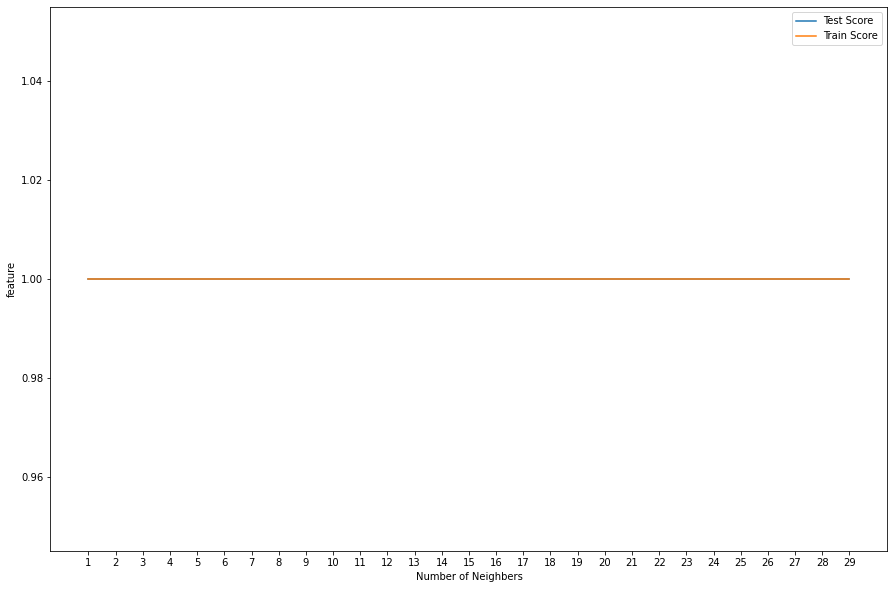

In [162]:
plt.figure(figsize=[15,10])
plt.plot(ran,test_list,label='Test Score')
plt.plot(ran,train_list,label = 'Train Score')
plt.xlabel('Number of Neighbers')
plt.ylabel('feature')
plt.xticks(ran)
plt.legend()
print("Best test score is {} and K = {}".format(np.max(test_list), test_list.index(np.max(test_list))+1))
print("Best train score is {} and K = {}".format(np.max(train_list), train_list.index(np.max(train_list))+1))

<h1>Find-s</h1>

In [163]:
concepts = x_train.to_numpy()
print(concepts)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [164]:
def train(con, tar):
  for i, val in enumerate(tar):
    if val == 1:
      specific_h = con[i].copy()
      break
          
  for i, val in enumerate(con):
    if tar[i] == 1:
      for x in range(len(specific_h)):
        if val[x] != specific_h[x]:
          specific_h[x] = '?'
        else:
          pass
      return specific_h

In [165]:
print(train(concepts, y_train))

[0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0]


<h1>candidate elimination </h1>

In [166]:
def learn(concepts, target):

    specific_h = concepts[0].copy()

    print("Initialization of specific_h and general_h")

    print("specific_h: ",specific_h)

    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]

    print("general_h: ",general_h)

    print("concepts: ",concepts)

    for i, h in enumerate(concepts):

        if target[i] == "yes":

            for x in range(len(specific_h)):

                #print("h[x]",h[x])

                if h[x] != specific_h[x]:

                    specific_h[x] = '?'

                    general_h[x][x] = '?'

        if target[i] == "no":

            for x in range(len(specific_h)):

                if h[x] != specific_h[x]:

                    general_h[x][x] = specific_h[x]

                else:

                    general_h[x][x] = '?'

    print("\nSteps of Candidate Elimination Algorithm: ",i+1)

    print("Specific_h: ",i+1)

    print(specific_h,"\n")

    print("general_h :", i+1)

    print(general_h)

    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]

    print("\nIndices",indices)

    for i in indices:

        general_h.remove(['?', '?', '?', '?', '?', '?'])

    return specific_h, general_h

s_final,g_final = learn(concepts, y_train)

print("\nFinal Specific_h:", s_final, sep="\n")

print("Final General_h:", g_final, sep="\n")

Initialization of specific_h and general_h
specific_h:  [0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0]
general_h:  [['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?', 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


<h1>Clustering</h1>


In [167]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x_train, y_train)
y_kmeans = kmeans.predict(x_data)
print(y_kmeans)

[0 2 2 2 0 2 2 2 0 0 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 0 0 2 0 0 2 0 2 0 0 2
 0 0 2 3 3 3 0 2 3 3 3 3 3 3 2 2 2 2 3 3 3 3 0 0 3 3 3 3 3 0 3 3 0 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3
 3 3 0 3 3 3 3 0 3 3 3 3 3 3 2 0 2 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 2 0 2 0 2
 2 0 2 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 2 0 2 0 2 3 2 3 0 3 3 0 0 3 3 3 3 3 3
 3 0 3 3 0 0 2 3 2 2 2 2 2 2 2 3 3 0 2 2 2 2 2 2 2 2 3 3 3 3 3 1 1 3 3 1 3
 0 1 1 2 3 0 0 0 3 2 3 2 2 3 2 2 0 0 0 0 2 2 2 0 2 0 0 0 2 0 0 2 0 2 0 3 3
 3 3 2 0 3 3 2 3 3 3 3 3 3 3 0 3 3 3 2 0 0 0 2 2 0 2 0 2 2 0 2 0 2 2 0 0 0
 2 0 0 2 2 0 0 2 2 2 2 2 0 2 0 3 2 0 0 2 2 3 3 0 3 3 3 3 3 0 0 3 0 3 0 3 0
 3 3 0 0 2 0 2 2 0 2 2 2 0 2 0 0 0 0 0 2 2 0 2 0 3 3 3 3 3 3 3 3 3 3 0 3 3
 3 3 3 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 2 0 0 2 0 2
 0 0 0 2 2 0 2 2 0 0 1 1 1 2 1 1 1 3 3 1 1 3 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1]


In [168]:
print(kmeans.cluster_centers_)

[[ 1.41025641e-01  4.74358974e-01  3.07692308e-01  5.12820513e-02
   4.74358974e-01  2.56410256e-02 -2.77555756e-16  3.33333333e-01
   5.12820513e-02  2.56410256e-02  2.69230769e-01  1.28205128e-01
   6.41025641e-02  1.15384615e-01  2.56410256e-02  5.12820513e-02
   1.28205128e-02  5.12820513e-02  1.41025641e-01  8.97435897e-02
   3.46944695e-18]
 [ 2.85714286e-01  5.35714286e-01  1.07142857e-01  2.14285714e-01
   8.57142857e-01  2.14285714e-01  8.21428571e-01  8.57142857e-01
   6.07142857e-01  8.21428571e-01  8.57142857e-01  4.64285714e-01
   6.78571429e-01  7.50000000e-01  1.07142857e-01  3.57142857e-01
   3.92857143e-01  8.21428571e-01  8.21428571e-01  7.14285714e-01
   3.46944695e-18]
 [ 6.57894737e-02  3.68421053e-01  1.05263158e-01  3.94736842e-02
   5.65789474e-01  3.94736842e-02  1.00000000e+00  5.00000000e-01
   1.24900090e-16  1.18421053e-01  3.81578947e-01  6.57894737e-02
   1.31578947e-02  1.44736842e-01 -1.04083409e-17  6.57894737e-02
   2.63157895e-02  2.63157895e-02  5.2

[0 0 3 2 0 3 0 0 1 3 2 0 1 3 3 2 3 2 2 2 0 2 0 3 1 0 3 0 2 3 2 0 3 2 3 0 3
 1 1 2 0 2 3 0 0 2 0 2 1 1 2 2 2 1 2 2 0 2 2 1 3 3 0 2 0 2 1 1 1 2 2 2 2 2
 3 1 2 2 0 0 0 3 3 3 2 3 3 1 2 0 0 3 3 0 3 1 1 3 3 2 2 0 2 0 0 0 2 0 2 2 0
 3 0 0 3 3 3 2 0 2 0 2 2 2 2 0 1 2 0 0 0 2 2 3 2 3 0 2 2 0 0 3 0 3 2 2 2 3
 3 3 0 3 1 2 3 2 2 0 3 3 1 0 3 1 0 3 1 2 0 3 2 2 0 0 1 3 3 2 0 3 0 2 2 3 0
 2 0 3 3 0 0 0 2 0 0 3 3 3 2 1 3 2 1 1 0 0 0 3 0 2 0 0 0 3 0 0 2 0 2 2 3 2
 3 0 2 1 0 0 2 3 0 2 0 1 0 0 1 2 2 3 3 0 0]


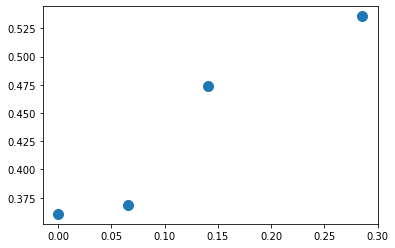

In [169]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100)
print(kmeans.labels_)

<h1>Naive-Bayes</h1>

In [170]:
nb = GaussianNB()
nb.fit(x_train, y_train.ravel())
print("Naive Bayes test accuracy: ", nb.score(x_test, y_test))

Naive Bayes test accuracy:  1.0


<h1>add False data </h1>

In [173]:
data_False = np.random.randint(2, size=(500,21))
Flase_data = pd.DataFrame(data_False, columns=('Sleep_problems', 'Headache', 'Diarrhea', 'Abdominal_pain',
                                              'body_pain', 'Body_discoloration',
                                              'Cough', 'Fever', 'Ague', 'Sore_throat',
                                              'Fatigue', 'runny_nose', 'Chest_pain',
                                              'Decreased_appetite', 'Vomit', 'Nausea',
                                              'Sneezing', 'Shortness_of_breath',
                                              'Loss_of_smell', 'Loss_of_taste', 'urticaria'))
Flase_data.head(500)

,Sleep_problems,Headache,Diarrhea,Abdominal_pain,body_pain,Body_discoloration,Cough,Fever,Ague,Sore_throat,Fatigue,runny_nose,Chest_pain,Decreased_appetite,Vomit,Nausea,Sneezing,Shortness_of_breath,Loss_of_smell,Loss_of_taste,urticaria
0,1,0,1,0,1,1,0,0,0,0,0,1,0,1,1,1,0,0,0,1,1
1,0,1,0,0,1,0,1,1,0,1,1,0,1,1,0,0,0,1,1,0,0
2,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,1,0,0,0,1,1
3,1,0,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,1,1,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,1,0
496,1,0,0,0,0,1,1,0,1,0,1,0,0,1,1,1,1,1,1,1,0
497,0,1,1,0,0,0,1,1,0,0,0,1,0,1,0,1,1,1,1,1,1
498,1,0,1,1,0,0,0,1,1,1,0,1,1,1,1,1,0,1,0,1,1


### export data for rapid minder

In [171]:
my = open('new_covid' + '.csv', 'w')
my.write(data.to_csv())
my.close()